In [1]:
# Description: This program uses an artificial neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation using the past 60 day stock price.

In [2]:
# Install dependencies
! pip install -U pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 6.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
# Import the libraries
import math
import datetime as dt
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Get the stock quote
df = web.DataReader(
    'BTC-USD',
    data_source='yahoo',
    start='2020-01-01',
    end=dt.datetime.now()
)
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,18565664997,7200.174316
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,20802083465,6985.470215
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,28111481032,7344.884277
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,18444271275,7410.656738
2020-01-05,7544.497070,7400.535645,7410.451660,7411.317383,19725074095,7411.317383
...,...,...,...,...,...,...
2022-06-23,21135.761719,19950.117188,19986.607422,21085.876953,26188097173,21085.876953
2022-06-24,21472.917969,20777.511719,21084.648438,21231.656250,24957784918,21231.656250
2022-06-25,21520.914062,20964.585938,21233.609375,21502.337891,18372538715,21502.337891


In [5]:
df.shape

(909, 6)

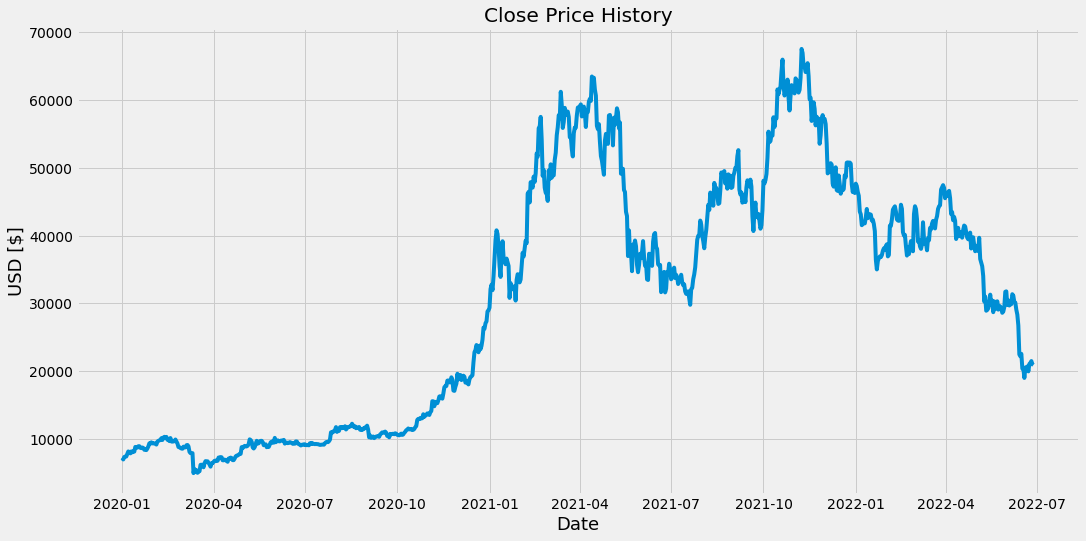

In [6]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('USD [$]', fontsize=18)
plt.show()

In [7]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe into a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

728


In [8]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[3.56154515e-02],
       [3.21854566e-02],
       [3.79272585e-02],
       [3.89780033e-02],
       [3.89885573e-02],
       [4.47062011e-02],
       [5.10080877e-02],
       [4.96688721e-02],
       [4.64611372e-02],
       [5.10538065e-02],
       [4.89927080e-02],
       [5.14682087e-02],
       [5.06965975e-02],
       [6.16169419e-02],
       [6.12853889e-02],
       [5.99558382e-02],
       [6.32348308e-02],
       [6.34548209e-02],
       [5.96756125e-02],
       [5.88991650e-02],
       [6.03090298e-02],
       [5.92703291e-02],
       [5.48872986e-02],
       [5.55090463e-02],
       [5.42695603e-02],
       [5.79276579e-02],
       [6.29278026e-02],
       [7.00971141e-02],
       [6.94267847e-02],
       [7.24998750e-02],
       [6.99683432e-02],
       [7.06448349e-02],
       [6.98698695e-02],
       [6.90576176e-02],
       [6.72594433e-02],
       [7.41682020e-02],
       [7.60273920e-02],
       [7.70840339e-02],
       [7.81891483e-02],
       [8.22078480e-02],


In [9]:
# Create the training dataset
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
prediction_days = 60
x_train = []
y_train = []
for i in range(prediction_days, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [10]:
# Convert the x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(668, 60, 1)

In [11]:
# Build the LSTM model
neurons = 50

model = Sequential()
model.add(LSTM(neurons, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(neurons, return_sequences=False))
model.add(Dense(neurons / 2))
model.add(Dense(1))

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
668/668 [==============================] - 19s 24ms/step - loss: 0.0061
Epoch 2/20
668/668 [==============================] - 16s 24ms/step - loss: 0.0027
Epoch 3/20
668/668 [==============================] - 16s 24ms/step - loss: 0.0017
Epoch 4/20
668/668 [==============================] - 16s 24ms/step - loss: 0.0013
Epoch 5/20
668/668 [==============================] - 16s 24ms/step - loss: 0.0018
Epoch 6/20
668/668 [==============================] - 17s 26ms/step - loss: 0.0012
Epoch 7/20
668/668 [==============================] - 16s 25ms/step - loss: 0.0013
Epoch 8/20
668/668 [==============================] - 16s 25ms/step - loss: 0.0011
Epoch 9/20
668/668 [==============================] - 18s 26ms/step - loss: 9.4471e-04
Epoch 10/20
668/668 [==============================] - 16s 25ms/step - loss: 9.5260e-04
Epoch 11/20
668/668 [==============================] - 16s 24ms/step - loss: 0.0011
Epoch 12/20
668/668 [==============================] - 16s 24ms/step - loss: 

In [14]:
# Create the testing data set
test_data = scaled_data[training_data_len - prediction_days:, :]
# Create the x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(prediction_days, len(test_data)):
  x_test.append(test_data[i-prediction_days:i, 0])

In [15]:
# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
print(rmse)

1510.389276156768


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


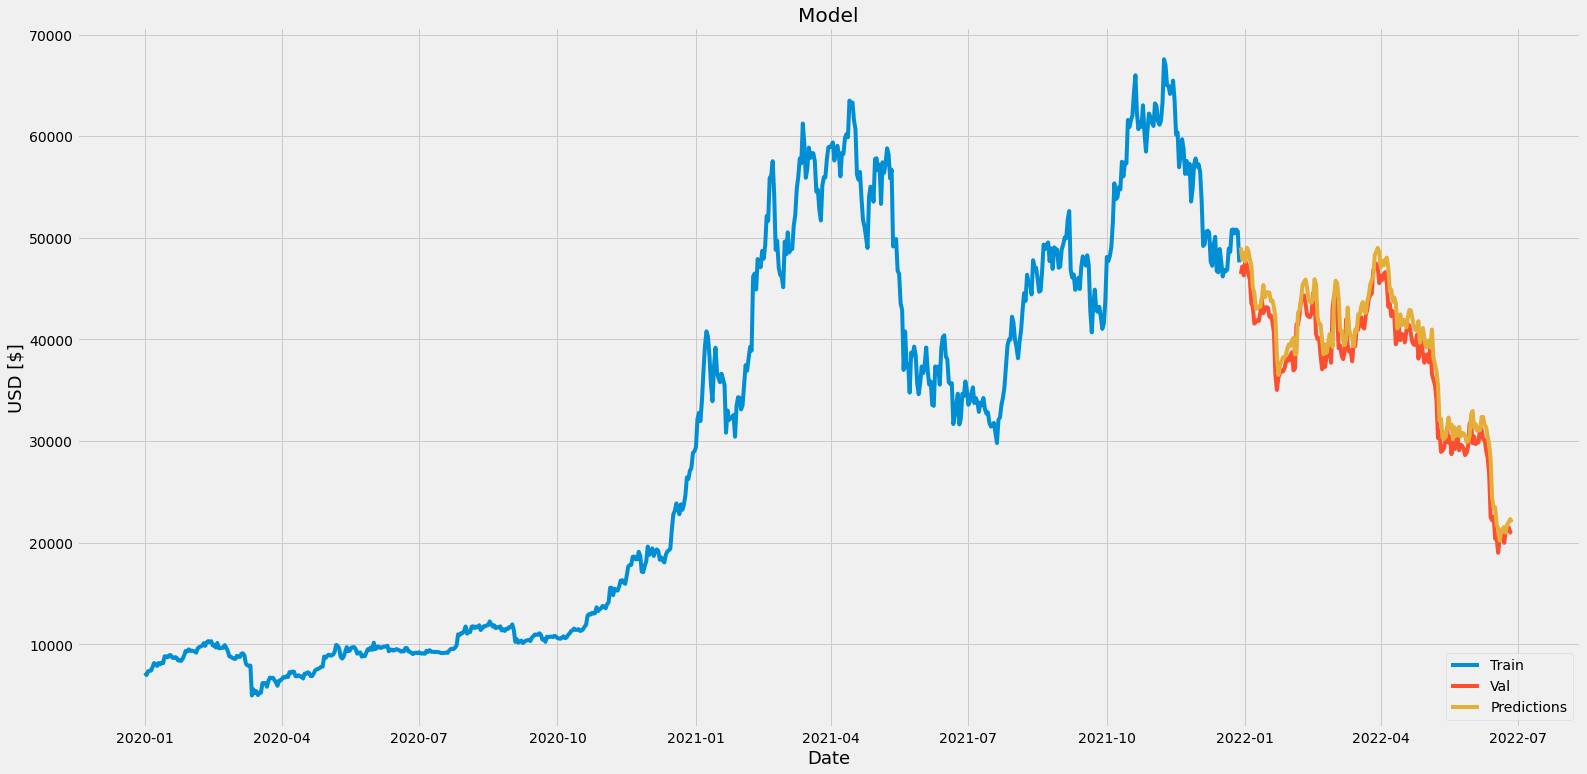

In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
# predictions = predictions - rmse
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(24,12))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('USD [$]', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-12-29,46444.710938,49047.757812
2021-12-30,47178.125000,47873.027344
2021-12-31,46306.445312,48505.480469
2022-01-01,47686.812500,47660.835938
2022-01-02,47345.218750,49032.734375
...,...,...
2022-06-23,21085.876953,21010.699219
2022-06-24,21231.656250,21772.886719
2022-06-25,21502.337891,22040.822266


In [20]:
# Get the quote
quote = web.DataReader(
    'BTC-USD',
    data_source='yahoo',
    start='2018-01-01',
    end=dt.datetime.now()
)
# Create a new dataframe
new_df = quote.filter(['Close'])
# Get the last 60 days closing price values
last_60_days = new_df[-60:].values
# Scale data to be between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create test
x_test = []
# Append the last 60 days
x_test.append(last_60_days_scaled)
# Convert the x_test to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(x_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[21865.982]]
